The data set which was obtained from Kaggle contains the English Premier League(EPL) first division match statistics between years 2000 - 2018. I selected this data set in order to predict the outcome of EPL matches between Liverpool FC (LFC) and other english teams at half time, full time and to determine if its either a high, medium or low scoring game. I selected this data set because it contains diverese EPL match statistics over a relatively long period of time.

Source: https://www.kaggle.com/devinharia/epl-dataset


The data set is downloaded as a csv file from Kaggle and unzipped to a specific location on my local drive. The code below sends a prompt to select the file that contains the EPL data set in order for it to be uploaded unto google collaboratory. Also relevant libraries like the Matplotlib, numpy, pandas and seaborn lwere imported

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
#imports KNN classifier
from sklearn.neighbors import KNeighborsClassifier
#imports logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#path to dataset
epl = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EPL 2000-2018.csv')

The command below imports the premier league match data set into a data frame that consist of 6461 rows and 23 columns. In the data frame the abbreviated words represent the following coulmns; FTAG: full time away goals, FTHG: full time home goals, FTR: full time results, HTR: half time results, HTAG: half time away goals
HTHG: half time home goals, HC: home team corners, AC: away team corners, HST: home team shots on target, AST: away team shots on target, HS: home team shots, AS: away team shots, HY: home team yellow cards, AY: away team yellow cards, HR: home team red cards, AR: away team red cards.

In [ ]:

#create new column for total number of goals (TNOG) by joining FTHG and FTAG columns
epl['TNOG'] = epl['FTHG'] + epl['FTAG']
#create coumn that classifies TNOG into categories
epl['SF'] = pd.cut(epl['TNOG'], bins=[0, 2, 5, 15], include_lowest=True, labels=['low', 'mid', 'high'])

#print the first five(5) output of the data set
epl.head(5)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Season,TNOG,SF
0,19/08/00,Charlton,Man City,4.0,0.0,H,2.0,0.0,H,Rob Harris,17.0,8.0,14.0,4.0,13.0,12.0,6.0,6.0,1.0,2.0,0.0,0.0,00-01,4.0,mid
1,19/08/00,Chelsea,West Ham,4.0,2.0,H,1.0,0.0,H,Graham Barber,17.0,12.0,10.0,5.0,19.0,14.0,7.0,7.0,1.0,2.0,0.0,0.0,00-01,6.0,high
2,19/08/00,Coventry,Middlesbrough,1.0,3.0,A,1.0,1.0,D,Barry Knight,6.0,16.0,3.0,9.0,15.0,21.0,8.0,4.0,5.0,3.0,1.0,0.0,00-01,4.0,mid
3,19/08/00,Derby,Southampton,2.0,2.0,D,1.0,2.0,A,Andy D'Urso,6.0,13.0,4.0,6.0,11.0,13.0,5.0,8.0,1.0,1.0,0.0,0.0,00-01,4.0,mid
4,19/08/00,Leeds,Everton,2.0,0.0,H,2.0,0.0,H,Dermot Gallagher,17.0,12.0,8.0,6.0,21.0,20.0,6.0,4.0,1.0,3.0,0.0,0.0,00-01,2.0,low


The data frame is further streamlined to focus on home and away matches played between Liverpool footbal club (LFC) and other english teams between 2000 - 2018. The new data frame is then examined to ensure it doesn't contain any null values

In [ ]:
#create data set of Liverpool FC games 
liverpool = np.where((epl['HomeTeam']=='Liverpool') | (epl['AwayTeam']=='Liverpool') )
liv = epl.loc[liverpool]
#search for null values in each columns in the liverpool fc data set
liv.isnull().sum()

Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
Season      0
TNOG        0
SF          0
dtype: int64

In [ ]:
#The dataset of liverpool fc EPL matches between 2000-2018
liv

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Season,TNOG,SF
6,19/08/00,Liverpool,Bradford,1.0,0.0,H,0.0,0.0,D,Paul Durkin,16.0,3.0,10.0,2.0,8.0,8.0,6.0,1.0,1.0,1.0,0.0,0.0,00-01,1.0,low
10,21/08/00,Arsenal,Liverpool,2.0,0.0,H,1.0,0.0,H,Graham Poll,17.0,7.0,12.0,4.0,25.0,20.0,10.0,11.0,2.0,4.0,1.0,2.0,00-01,2.0,low
26,26/08/00,Southampton,Liverpool,3.0,3.0,D,0.0,1.0,A,Jeff Winter,14.0,9.0,7.0,4.0,7.0,6.0,7.0,1.0,0.0,0.0,0.0,0.0,00-01,6.0,high
38,06/09/00,Liverpool,Aston Villa,3.0,1.0,H,3.0,0.0,H,Neale Barry,11.0,9.0,7.0,4.0,13.0,7.0,8.0,7.0,0.0,2.0,0.0,0.0,00-01,4.0,mid
43,09/09/00,Liverpool,Man City,3.0,2.0,H,1.0,0.0,H,Graham Barber,14.0,9.0,8.0,7.0,17.0,17.0,9.0,4.0,3.0,4.0,0.0,0.0,00-01,5.0,mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6408,14/04/18,Liverpool,Bournemouth,3.0,0.0,H,1.0,0.0,H,C Kavanagh,20.0,6.0,7.0,1.0,9.0,9.0,7.0,5.0,1.0,1.0,0.0,0.0,17-18,3.0,mid
6420,21/04/18,West Brom,Liverpool,2.0,2.0,D,0.0,1.0,A,S Attwell,13.0,9.0,6.0,3.0,12.0,5.0,7.0,4.0,0.0,1.0,0.0,0.0,17-18,4.0,mid
6428,28/04/18,Liverpool,Stoke,0.0,0.0,D,0.0,0.0,D,A Marriner,20.0,5.0,2.0,1.0,7.0,14.0,9.0,2.0,1.0,2.0,0.0,0.0,17-18,0.0,low
6443,06/05/18,Chelsea,Liverpool,1.0,0.0,H,1.0,0.0,H,A Taylor,12.0,10.0,4.0,5.0,12.0,9.0,3.0,1.0,3.0,2.0,0.0,0.0,17-18,1.0,low


In [ ]:
liv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 646 entries, 6 to 6454
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Date      646 non-null    object  
 1   HomeTeam  646 non-null    object  
 2   AwayTeam  646 non-null    object  
 3   FTHG      646 non-null    float64 
 4   FTAG      646 non-null    float64 
 5   FTR       646 non-null    object  
 6   HTHG      646 non-null    float64 
 7   HTAG      646 non-null    float64 
 8   HTR       646 non-null    object  
 9   Referee   646 non-null    object  
 10  HS        646 non-null    float64 
 11  AS        646 non-null    float64 
 12  HST       646 non-null    float64 
 13  AST       646 non-null    float64 
 14  HF        646 non-null    float64 
 15  AF        646 non-null    float64 
 16  HC        646 non-null    float64 
 17  AC        646 non-null    float64 
 18  HY        646 non-null    float64 
 19  AY        646 non-null    float64 
 20  HR       

This provides a brief description of Liverpool football club (LFC) data frame. The data frame here consist of 19 columns and 646 rows of data.Of all the 17 columns, 11 columns consist of numerical data while the rest contain string

In [ ]:
liv.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,TNOG
count,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000
mean,1.599071,1.137771,0.721362,0.465944,13.676471,10.427245,6.487616,4.876161,11.003096,11.702786,6.038700,4.653251,1.312693,1.750774,0.074303,0.097523,2.736842
std,1.307794,1.205117,0.853488,0.696337,6.071331,4.815041,3.529148,3.002865,3.881180,4.038753,3.296235,2.807611,1.111488,1.270338,0.279627,0.317099,1.666479
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,9.000000,7.000000,4.000000,3.000000,8.000000,9.000000,4.000000,3.000000,0.000000,1.000000,0.000000,0.000000,2.000000
50%,1.000000,1.000000,0.500000,0.000000,13.000000,10.000000,6.000000,4.000000,11.000000,11.000000,6.000000,4.000000,1.000000,2.000000,0.000000,0.000000,3.000000
75%,2.000000,2.000000,1.000000,1.000000,17.750000,13.000000,9.000000,6.750000,13.000000,14.000000,8.000000,6.000000,2.000000,3.000000,0.000000,0.000000,4.000000
max,6.000000,6.000000,5.000000,4.000000,37.000000,26.000000,20.000000,15.000000,25.000000,27.000000,20.000000,17.000000,5.000000,7.000000,2.000000,2.000000,9.000000


The .describe|() command generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. From the above, it can be seen that of all the 646 english premiership games played between liverpool fc and other teams from 2000 - 2018 ended with an average of 2.73 ~ 3goals total number of goals scored at full time

In [ ]:
#liverpool fc matches that produced the most goals 
liv_htnog= liv.loc[liv['TNOG']== 9]
liv_htnog

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Season,TNOG,SF
4851,22/03/14,Cardiff,Liverpool,3.0,6.0,A,2.0,2.0,D,N Swarbrick,9.0,19.0,3.0,9.0,14.0,11.0,4.0,6.0,2.0,3.0,0.0,0.0,13-14,9.0,high
5544,23/01/16,Norwich,Liverpool,4.0,5.0,A,2.0,1.0,H,L Mason,6.0,13.0,5.0,7.0,10.0,14.0,3.0,3.0,0.0,1.0,0.0,0.0,15-16,9.0,high


In [ ]:
#Away matches where Liverpool fc scored the most goals at half time
liv_hshtag = liv.loc[((liv['HTR']=='A') & (liv['AwayTeam']== 'Liverpool') & (liv['HTAG']== 4))]
liv_hshtag

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Season,TNOG,SF
2050,02/12/06,Wigan,Liverpool,0.0,4.0,A,0.0,4.0,A,M Riley,15.0,9.0,6.0,6.0,9.0,14.0,8.0,2.0,2.0,2.0,0.0,0.0,06-07,4.0,mid


In [ ]:
#Home matches where Liverpool fc scored the most goals at half time
liv_hshthg = liv.loc[((liv['HTR']=='H') & (liv['HomeTeam']== 'Liverpool')& (liv['HTHG']== 4))]
liv_hshthg

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Season,TNOG,SF
4803,08/02/14,Liverpool,Arsenal,5.0,1.0,H,4.0,0.0,H,M Oliver,22.0,11.0,12.0,6.0,14.0,14.0,6.0,6.0,1.0,2.0,0.0,0.0,13-14,6.0,high


In [ ]:
#Home matches where Liverpool fc scored the most goals at full time
liv_hsfthg = liv.loc[((liv['FTR']=='H') & (liv['HomeTeam']== 'Liverpool')& (liv['FTHG']== 6))]
liv_hsfthg

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Season,TNOG,SF
2319,01/09/07,Liverpool,Derby,6.0,0.0,H,2.0,0.0,H,A Wiley,20.0,8.0,10.0,3.0,10.0,14.0,4.0,2.0,0.0,1.0,0.0,0.0,07-08,6.0,high
3099,26/09/09,Liverpool,Hull,6.0,1.0,H,2.0,1.0,H,P Walton,22.0,7.0,14.0,3.0,10.0,3.0,13.0,2.0,1.0,4.0,0.0,0.0,09-10,7.0,high
5809,06/11/16,Liverpool,Watford,6.0,1.0,H,3.0,0.0,H,M Oliver,28.0,11.0,17.0,8.0,14.0,10.0,6.0,3.0,1.0,2.0,0.0,0.0,16-17,7.0,high


In [ ]:
#Away matches where liverpool fc scored the most goals at full time
liv_hsftag= liv.loc[((liv['FTR']=='A') & (liv['AwayTeam']== 'Liverpool')& (liv['FTAG']== 6))]
liv_hsftag

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Season,TNOG,SF
736,26/04/2003,West Brom,Liverpool,0.0,6.0,A,0.0,1.0,A,D Gallagher,9.0,18.0,5.0,14.0,12.0,6.0,4.0,3.0,1.0,1.0,0.0,0.0,02-03,6.0,high
4519,27/04/13,Newcastle,Liverpool,0.0,6.0,A,0.0,2.0,A,A Marriner,5.0,11.0,1.0,10.0,14.0,7.0,5.0,7.0,3.0,2.0,1.0,0.0,12-13,6.0,high
4851,22/03/14,Cardiff,Liverpool,3.0,6.0,A,2.0,2.0,D,N Swarbrick,9.0,19.0,3.0,9.0,14.0,11.0,4.0,6.0,2.0,3.0,0.0,0.0,13-14,9.0,high
5579,14/02/16,Aston Villa,Liverpool,0.0,6.0,A,0.0,2.0,A,N Swarbrick,6.0,11.0,1.0,9.0,10.0,9.0,0.0,6.0,3.0,1.0,0.0,0.0,15-16,6.0,high


In [ ]:
liv['Referee'].unique()

array(['Paul Durkin', 'Graham Poll', 'Jeff Winter', 'Neale Barry',
       'Graham Barber', 'David Ellaray', 'Mike Riley', 'Dermot Gallagher',
       'Steve Bennett', "Andy D'Urso", 'Mark Halsey', 'Barry Knight',
       'Rob Styles', 'Alan Wiley', 'Steve Lodge', 'Steve Dunn',
       'Peter Jones', "A D'Urso", 'J Winter', 'S Bennett', 'G Poll',
       'N Barry', 'R Styles', 'D Elleray', 'P Durkin', 'G Barber',
       'S Dunn', 'M Riley', 'E Wolstenholme', 'M Halsey', 'A Wiley',
       'D Gallagher', 'M Messias', 'C Wilkes', 'U Rennie', 'P Dowd',
       'B Knight', 'M Clattenburg', 'H Webb', '�D Gallagher',
       'M Atkinson', 'P Walton', 'A Marriner', 'L Mason', 'S Tanner',
       'M Jones', 'L Probert', 'S Attwell', 'K Friend', 'M Oliver',
       'A Taylor', 'N Swarbrick', 'R East', 'J Moss', 'C Pawson',
       'R Madley', 'M Dean', 'G Scott', 'P Tierney', 'C Kavanagh'],
      dtype=object)

In [ ]:
b = pd.Categorical(liv['Referee'])
b.describe()

,counts,freqs
categories,,
A D'Urso,5,0.007740
A Marriner,38,0.058824
A Taylor,29,0.044892
A Wiley,31,0.047988
Alan Wiley,2,0.003096
Andy D'Urso,1,0.001548
B Knight,5,0.007740
Barry Knight,2,0.003096
C Kavanagh,1,0.001548


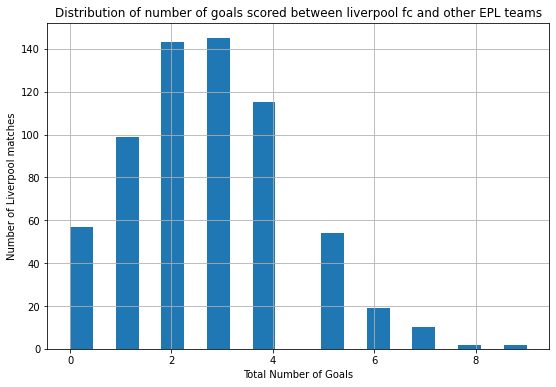

In [ ]:
#creates a histogram of the total number of lfc goals 
liv.hist(column = 'TNOG',
               figsize = (9,6),
               bins = 20)
plt.ylabel('Number of Liverpool matches') # y-axis
plt.xlabel('Total Number of Goals') # x-axis
plt.title('Distribution of number of goals scored between liverpool fc and other EPL teams')
plt.show()

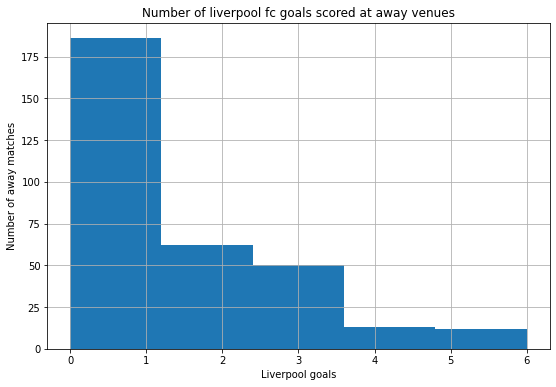

In [ ]:
liv_away= liv[liv['AwayTeam'].str.contains('Liverpool')]
liv_away.hist(column = 'FTAG',
               figsize = (9,6),
               bins = 5)
plt.ylabel('Number of away matches') # y-axis
plt.xlabel('Liverpool goals') # x-axis
plt.title('Number of liverpool fc goals scored at away venues')
plt.show()

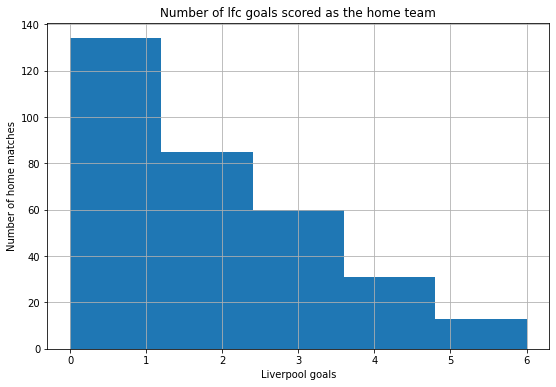

In [ ]:
liv_home= liv[liv['HomeTeam'].str.contains('Liverpool')]
liv_home.hist(column = 'FTHG',
               figsize = (9,6),
               bins = 5)

plt.ylabel('Number of home matches') # y-axis
plt.xlabel('Liverpool goals') # x-axis
plt.title('Number of lfc goals scored as the home team')
plt.show()

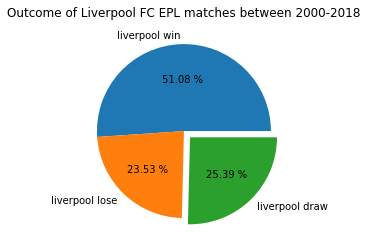

In [ ]:
#EPL matches won by liverpool
liv_win = liv.loc[((liv['FTR']=='H') & (liv['HomeTeam']== 'Liverpool') |(liv['FTR']=='A') &(liv['AwayTeam']=='Liverpool'))].count()[0]
#EPL matches lost by liverpool
liv_lose = liv.loc[((liv['FTR']=='H') & (liv['AwayTeam']== 'Liverpool') |(liv['FTR']=='A') &(liv['HomeTeam']=='Liverpool'))].count()[0]
#EPL matches drawn between liverpool and other teams
liv_draw = liv.loc[((liv['FTR']=='D') & (liv['AwayTeam']== 'Liverpool') |(liv['FTR']=='D') &(liv['HomeTeam']=='Liverpool'))].count()[0]

labels = ['liverpool win','liverpool lose','liverpool draw']
explode = (0,0,.1)
#craetes the pie chart
plt.pie([liv_win,liv_lose,liv_draw],labels=labels, autopct='%.2f %%', explode = explode)
plt.title('Outcome of Liverpool FC EPL matches between 2000-2018')
plt.show()

From the pie chart, it can be deduced that liverpool won a little more than half of thier EPLl matches (51.08%) over the span of 18 years

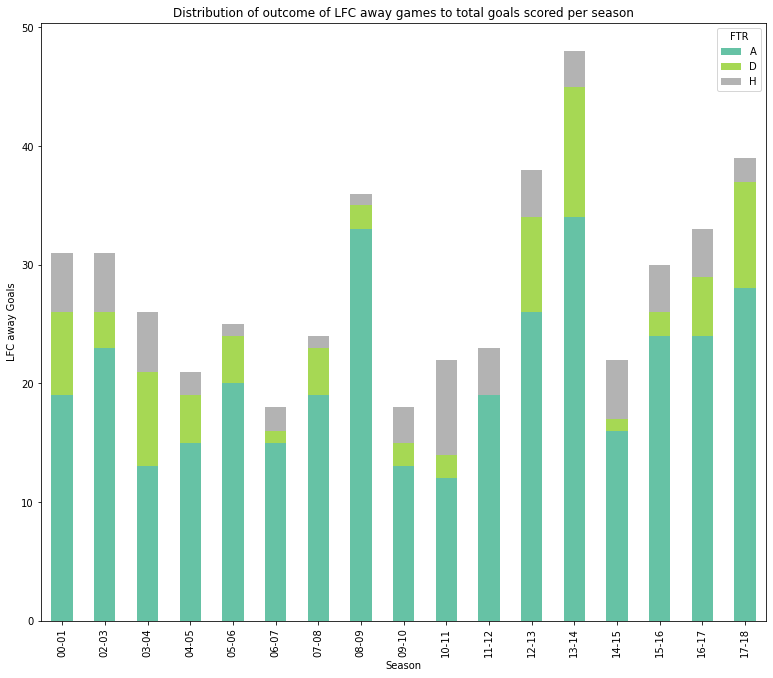

In [ ]:
liv_away_results = liv_away.groupby(['Season','FTR']).FTAG.sum()
liv_away_results.unstack().plot(kind='bar',stacked=True, colormap= 'Set2',  
                           grid=False,  figsize=(13,11))
plt.title('Distribution of outcome of LFC away games to total goals scored per season')
plt.ylabel('LFC away Goals')
plt.show()

from the above, it can be seen that liverpool fc most productive season in front of goal at away grounds was in 13-14 season where they also won thier most away games. LFC lost 11 away games in 10-11 season which accounted for their most away games lost in a season. The data below represents the away games lost in 10-11 season

In [ ]:
liv_most_away_Gloss= liv.loc[((liv['FTR']== 'H') & (liv['AwayTeam']=='Liverpool') & (liv['Season']=='10-11'))]
liv_most_away_Gloss

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Season,TNOG,SF
3439,23/08/10,Man City,Liverpool,3.0,0.0,H,1.0,0.0,H,P Dowd,8.0,13.0,3.0,7.0,13.0,12.0,5.0,4.0,1.0,1.0,0.0,0.0,10-11,3.0,mid
3468,19/09/10,Man United,Liverpool,3.0,2.0,H,1.0,0.0,H,H Webb,16.0,7.0,7.0,1.0,15.0,10.0,6.0,1.0,4.0,1.0,0.0,0.0,10-11,5.0,mid
3498,17/10/10,Everton,Liverpool,2.0,0.0,H,1.0,0.0,H,H Webb,9.0,15.0,6.0,9.0,10.0,9.0,8.0,7.0,2.0,2.0,0.0,0.0,10-11,2.0,low
3543,13/11/10,Stoke,Liverpool,2.0,0.0,H,0.0,0.0,D,M Halsey,14.0,10.0,7.0,6.0,14.0,10.0,4.0,3.0,2.0,3.0,0.0,1.0,10-11,2.0,low
3569,28/11/10,Tottenham,Liverpool,2.0,1.0,H,0.0,1.0,A,M Atkinson,20.0,12.0,13.0,8.0,6.0,16.0,5.0,8.0,0.0,5.0,0.0,0.0,10-11,3.0,mid
3582,11/12/10,Newcastle,Liverpool,3.0,1.0,H,1.0,0.0,H,L Mason,8.0,16.0,5.0,7.0,19.0,13.0,2.0,5.0,2.0,1.0,0.0,0.0,10-11,4.0,mid
3625,05/01/11,Blackburn,Liverpool,3.0,1.0,H,2.0,0.0,H,A Marriner,10.0,13.0,4.0,9.0,14.0,13.0,0.0,7.0,1.0,1.0,0.0,0.0,10-11,4.0,mid
3630,12/01/11,Blackpool,Liverpool,2.0,1.0,H,1.0,1.0,D,M Oliver,13.0,10.0,9.0,6.0,6.0,13.0,3.0,3.0,1.0,3.0,0.0,0.0,10-11,3.0,mid
3694,27/02/11,West Ham,Liverpool,3.0,1.0,H,2.0,0.0,H,M Halsey,17.0,12.0,11.0,8.0,10.0,8.0,6.0,8.0,0.0,1.0,0.0,0.0,10-11,4.0,mid
3723,02/04/11,West Brom,Liverpool,2.0,1.0,H,0.0,0.0,D,M Atkinson,17.0,13.0,14.0,9.0,10.0,15.0,0.0,5.0,2.0,3.0,0.0,0.0,10-11,3.0,mid


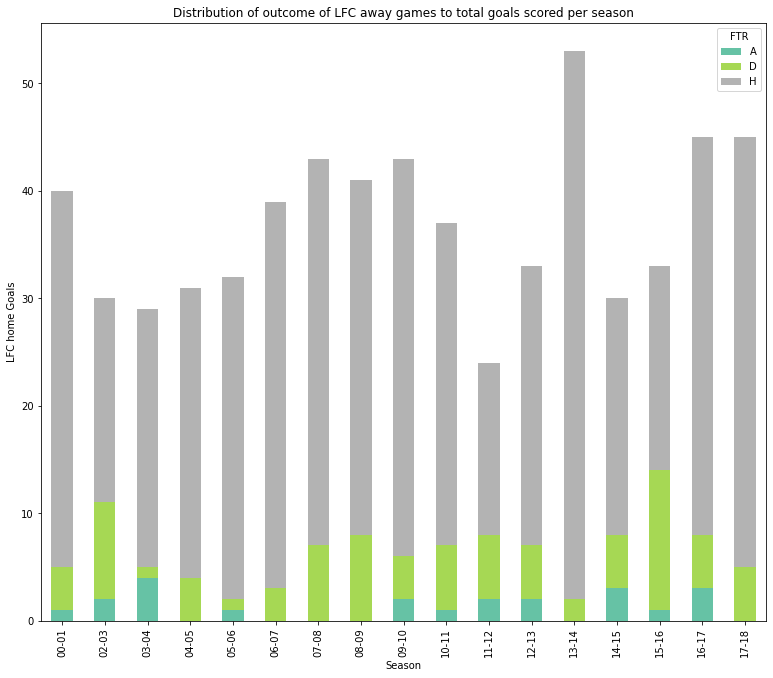

In [ ]:
liv_home_results= liv_home.groupby(['Season','FTR']).FTHG.sum()
liv_home_results.unstack().plot(kind='bar',stacked=True, colormap= 'Set2',  
                           grid=False,  figsize=(13,11))
plt.title('Distribution of outcome of LFC away games to total goals scored per season')
plt.ylabel('LFC home Goals')
plt.show()

Similarly from the above, it can be seen that LFC scored thier most home goals and won their most home games in the 13-14 season. they recorded their highest number of home matches lost in 03-04 and drew most home matches in the 15-16 season

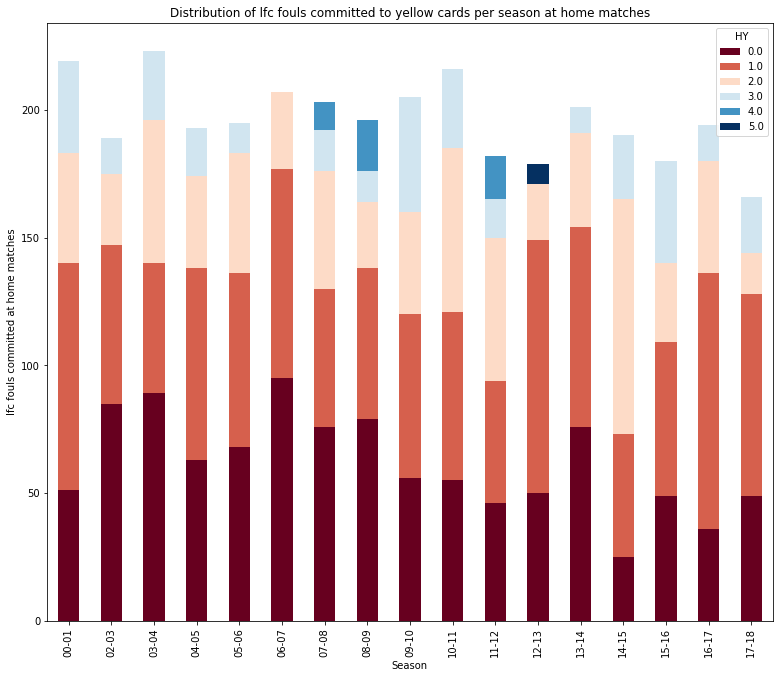

In [ ]:
liv_home_yellow= liv_home.groupby(['Season','HY']).HF.sum()
liv_home_yellow.unstack().plot(kind='bar',stacked=True, colormap= 'RdBu',  
                           grid=False,  figsize=(13,11))
plt.title('Distribution of lfc fouls committed to yellow cards per season at home matches')
plt.ylabel('lfc fouls committed at home matches')
plt.show()

In [ ]:
liv_most_home_yellow= liv.loc[((liv['HY']== 5) & (liv['HomeTeam']=='Liverpool'))]
liv_most_home_yellow

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Season,TNOG,SF
4514,21/04/13,Liverpool,Chelsea,2.0,2.0,D,0.0,1.0,A,K Friend,23.0,9.0,12.0,6.0,8.0,11.0,8.0,5.0,5.0,2.0,0.0,0.0,12-13,4.0,mid


we can see based on the graph that fouls committed by LFC has been on the decline and only in 12-13 season did they collect 5 yellow cards which happened in a game against chelsea

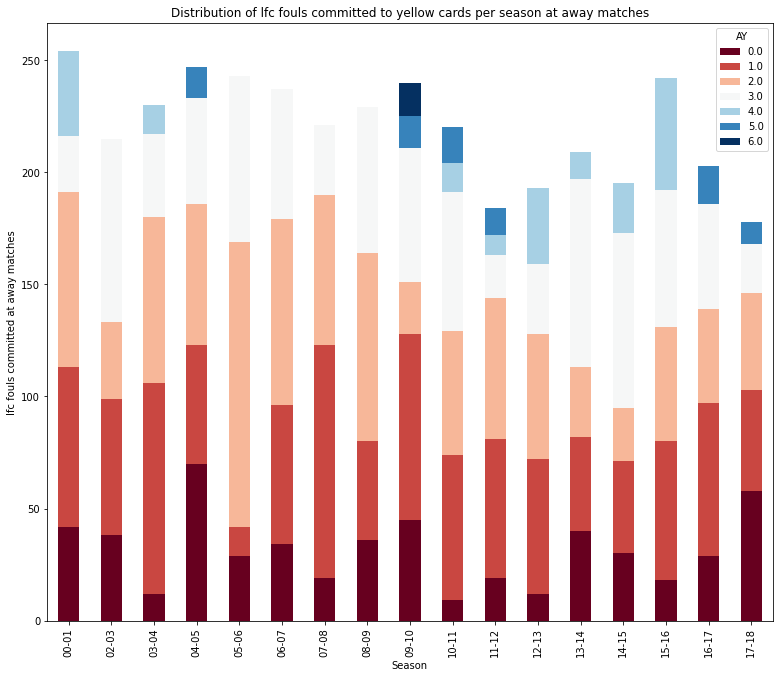

In [ ]:
liv_away_yellow = liv_away.groupby(['Season','AY']).AF.sum()
liv_away_yellow.unstack().plot(kind='bar',stacked=True, colormap= 'RdBu',  
                           grid=False,  figsize=(13,11))
plt.title('Distribution of lfc fouls committed to yellow cards per season at away matches')
plt.ylabel('lfc fouls committed at away matches')
plt.show()

Similarly by comparing the 'Distribution of lfc fouls committed to yellow cards per season at away matches and Distribution of lfc fouls committed to yellow cards per season at home matches graphs, we can deduce that LFC commit more fouls and recieve more warnings (yellow cards) away than at home games. LFC were handed their most yellow cards in an away game against Man City in the 09-10 season

In [ ]:
liv_most_away_yellow= liv.loc[((liv['AY']== 6) & (liv['AwayTeam']=='Liverpool'))]
liv_most_away_yellow

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Season,TNOG,SF
3302,21/02/10,Man City,Liverpool,0.0,0.0,D,0.0,0.0,D,P Walton,4.0,6.0,1.0,2.0,7.0,15.0,8.0,5.0,1.0,6.0,0.0,0.0,09-10,0.0,low


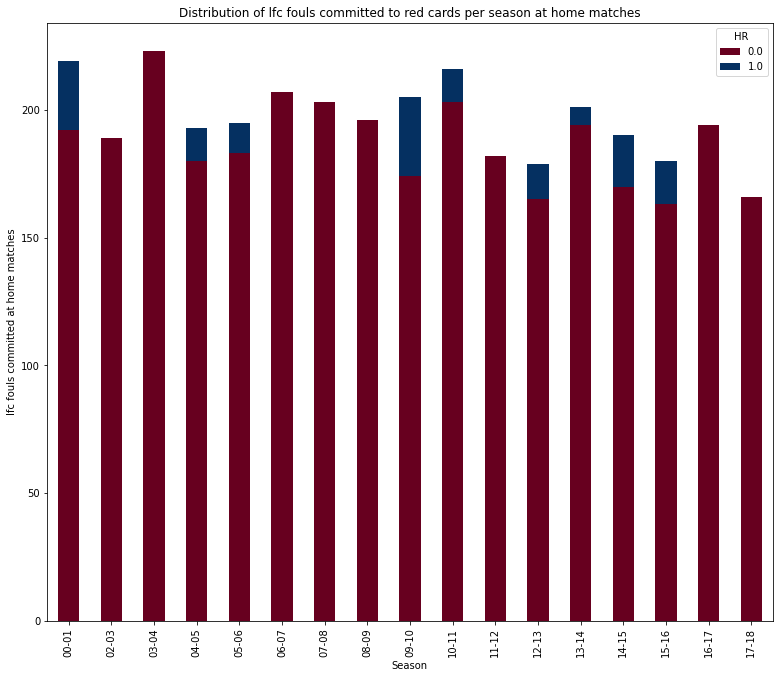

In [ ]:
liv_home_red = liv_home.groupby(['Season','HR']).HF.sum()
liv_home_red.unstack().plot(kind='bar',stacked=True, colormap= 'RdBu',  
                           grid=False,  figsize=(13,11))
plt.title('Distribution of lfc fouls committed to red cards per season at home matches')
plt.ylabel('lfc fouls committed at home matches')
plt.show()

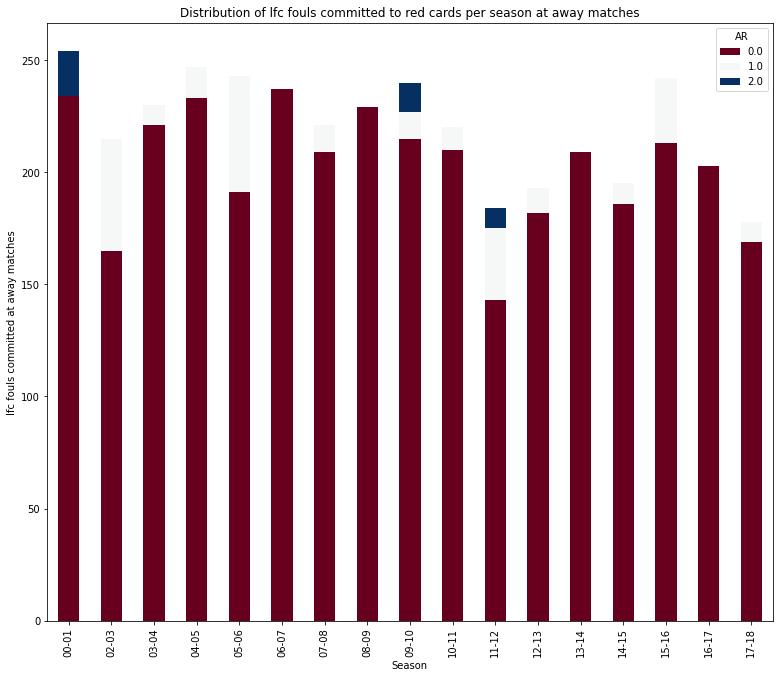

In [ ]:
liv_away_red = liv_away.groupby(['Season','AR']).AF.sum()
liv_away_red.unstack().plot(kind='bar',stacked=True, colormap= 'RdBu',  
                           grid=False,  figsize=(13,11))
plt.title('Distribution of lfc fouls committed to red cards per season at away matches')
plt.ylabel('lfc fouls committed at away matches')
plt.show()

Likewise when we compare the Distribution of lfc fouls committed to red cards per season at away matches and the Distribution of lfc fouls committed to red cards per season at home matches graphs, it can be seen that LFC players get dismissed more (given red cards) from away games that at home games. Also in matches aginst Arsenal, Fulham and Tottenham (all clubs based in london), LFC have had more than 1 players awarded a red card.

In [ ]:
liv_most_red= liv.loc[((liv['AR']== 2) & (liv['AwayTeam']=='Liverpool'))]
liv_most_red

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Season,TNOG,SF
10,21/08/00,Arsenal,Liverpool,2.0,0.0,H,1.0,0.0,H,Graham Poll,17.0,7.0,12.0,4.0,25.0,20.0,10.0,11.0,2.0,4.0,1.0,2.0,00-01,2.0,low
3140,31/10/09,Fulham,Liverpool,3.0,1.0,H,1.0,1.0,D,L Mason,10.0,6.0,6.0,3.0,10.0,13.0,2.0,2.0,1.0,0.0,0.0,2.0,09-10,4.0,mid
3848,18/09/11,Tottenham,Liverpool,4.0,0.0,H,1.0,0.0,H,M Jones,24.0,5.0,16.0,2.0,10.0,9.0,4.0,1.0,1.0,4.0,0.0,2.0,11-12,4.0,mid


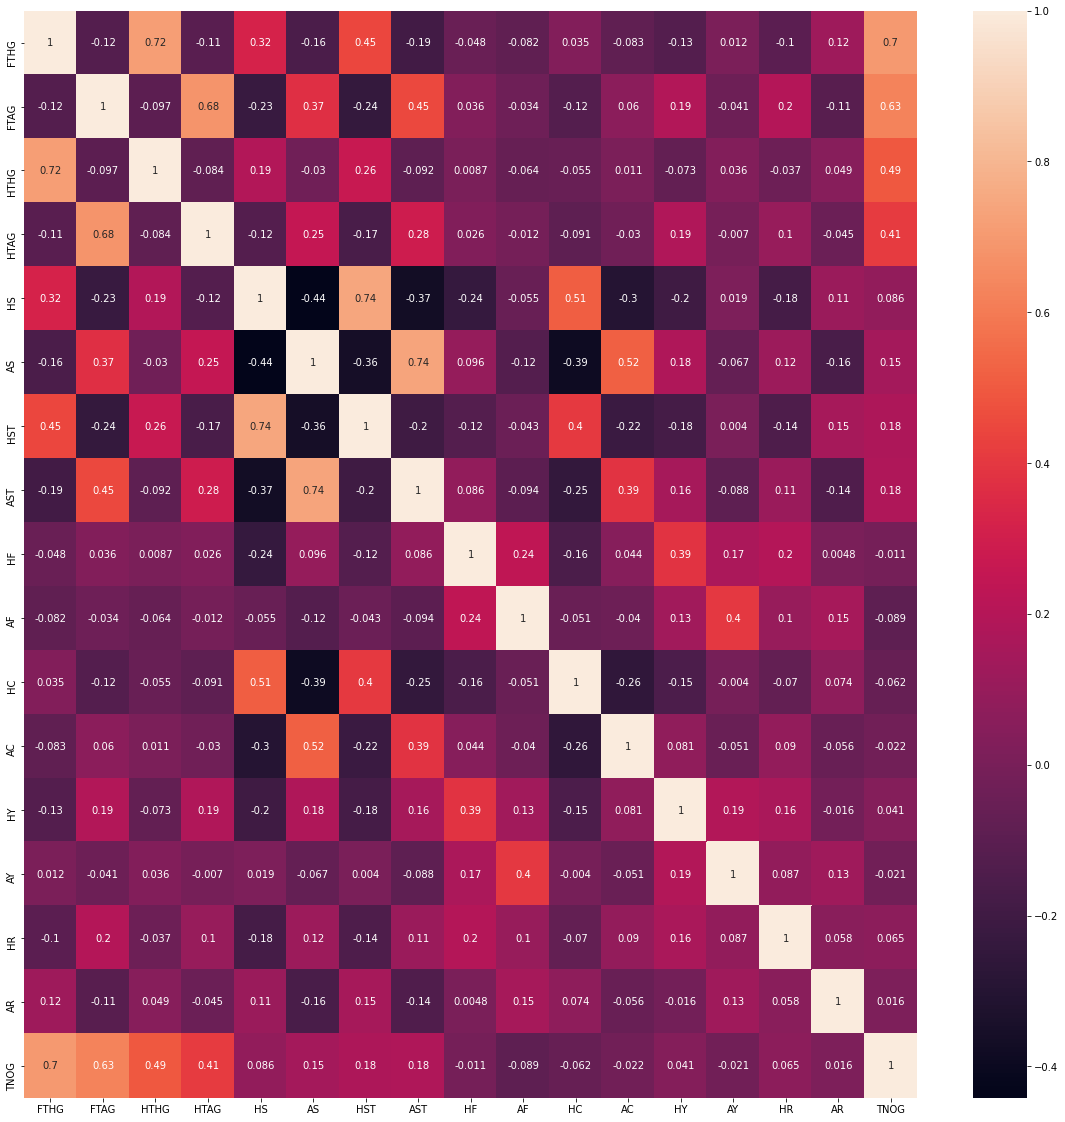

In [ ]:
cor_liv = liv.corr()
f, ax = plt.subplots(figsize =(20,20))
sns.heatmap(cor_liv, annot = True)

install the scikit-plot module which will be used fro plotting on google colab

In [ ]:
pip install scikit-plot

In [ ]:
import scikitplot as skplt

# 1) Logistic Regression Algorithm

Logistic regression is classified under supervised learning. it is used to describe data and to explain the relationship that exist between one dependent variable and one or more nominal, ordinal, interval or ratio-level independent variables using the logistic function. this algorithm was chosen because it can be used to both categorize and classify dependent/target variables. The steps in developing a logisitic regression model are as follows

## a) Full time Results Prediction

Define the independent variables/features and the dependent variable. the full time results represents our dependent variable, while the full time away goals, full time home goals, away team red card and home team red card represent the predictor/independent variables

In [ ]:
#independent variables
A = liv.loc[:,['HY','AY','HST','AST','AR','HR','HTAG','HTHG']]
#target/dependent variable
B = liv['FTR']

split the data set into sections for testing and training. Represent the model(full_time) by using the logistic regression function, then fit the model on the training data

In [ ]:
from sklearn.model_selection import train_test_split
#split the training and tetsing data 
x_train,x_test,y_train,y_test = train_test_split(A,B)

#training the logistic Regression model on the training data set
from sklearn.linear_model import LogisticRegression
full_time = LogisticRegression()
#train the model
full_time.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

make predicitions and utilize the classification report to evaluate the model

In [ ]:
#making class predictions for the training data set
m = full_time.predict(x_test)
#evaluate the model using classification report
print(classification_report(m,y_test))

              precision    recall  f1-score   support

           A       0.84      0.58      0.69        55
           D       0.21      0.53      0.30        19
           H       0.86      0.74      0.79        88

    accuracy                           0.66       162
   macro avg       0.64      0.62      0.59       162
weighted avg       0.77      0.66      0.70       162



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


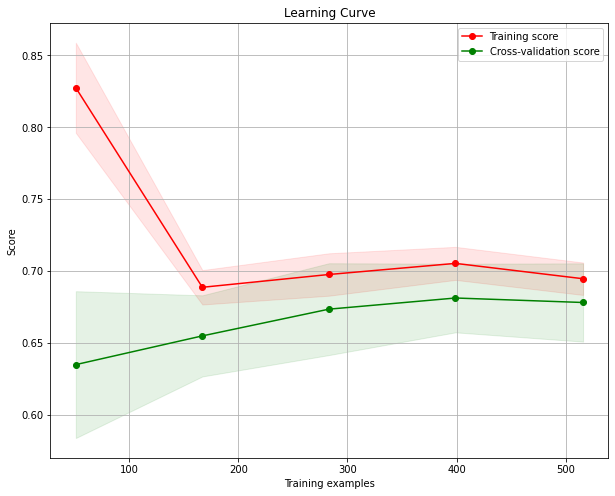

In [ ]:
#Generates a plot of the train and test learning curves for logistic regression for the full time results of lfc matches
skplt.estimators.plot_learning_curve(full_time, A,B,figsize=(10,8))
plt.show()

# 2. KNN Algorithm

K-Nearest Neighbors algorithm is a supervised machine learning algorithm which measures the distance(euclidean, Manhattan etc) of a new data point to the training data points. It then selects the K-nearest data points, where K can be any integer. It allocates the new data point to the class to which the majority of the K data points belong. KNN was selected as the algortihm for this data set because it can be used to predict the catergory the new data point should be classified into. KNN algorithm will be used to predict the full time results(home team win, draw, away team win), half time results(home team win, draw, away team win) and to determine whether an english premier league match involving Liverpoof fc match will be a high , mid or low scoring game based on some predefine features. the process in creating the model for the KNN algorithm is described as follows:

https://miro.medium.com/max/813/0*Sk18h9op6uK9EpT8.

## a) Full time results (FTR) predicton

The LFC dataset is divided into training and test split. this will assist in determing the performance of the algorithm in catergorizing unclassfied data in the tesing phase. the full time result (FTR) will be the target/dependent variable data while the full time home goals(FTHG), full time away goals(FTAG), away team red cards(AR), and home team red cards(HR) will be the attributes/input all of which are assigned to variables

In [ ]:
#define the independent variables
A = liv.loc[:,['HY','AY','HST','AST','AR','HR','HTAG','HTHG']]
#define the target/dependent variable
B = liv['FTR']

In [ ]:
from sklearn.model_selection import train_test_split
# split the data set
x_train,x_test,y_train,y_test = train_test_split(A,B)

next the KNN algorithm will be trained for it to be able to make predicitions. The KNeighborClassifier class will be imported form the sklearn.neighbors library in order for predicitions to be made on the test data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# define the model for the full time results of lfc matches using KNeighbors classifier
full_time_knn = KNeighborsClassifier(metric='euclidean')
# fit the train data to the model
full_time_knn.fit(x_train,y_train)
#make predicitions
p=full_time_knn.predict(x_test)

After predicition, the algorithm will be evaluated. metrics that can be used to assess an algorithm include recall, precision and f1 score. the classification_report method can be used to calculate theses metrics 

In [ ]:
full_time_knn.score(x_test,y_test)
print(classification_report(p,y_test))

              precision    recall  f1-score   support

           A       0.67      0.56      0.61        50
           D       0.40      0.40      0.40        40
           H       0.68      0.75      0.71        72

    accuracy                           0.60       162
   macro avg       0.58      0.57      0.57       162
weighted avg       0.60      0.60      0.60       162



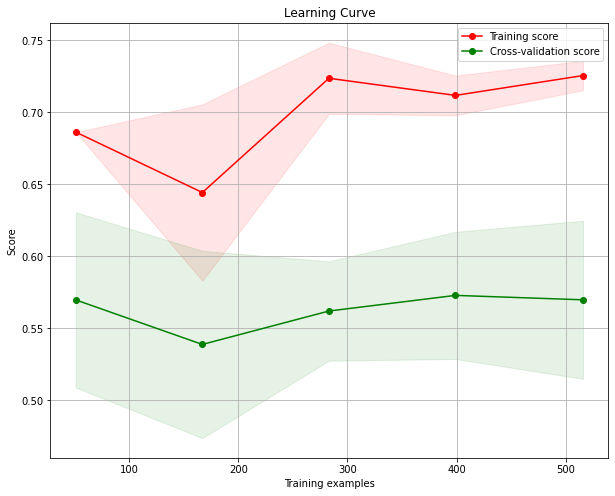

In [ ]:
#Generates a plot of the train and test learning curves for the knn classifier for the full time results of lfc matches
skplt.estimators.plot_learning_curve(full_time_knn, A, B, figsize=(10,8))
plt.show()

Cross-validation technique is used for evaluate how the results of a statistical analysis will generalize to an independent data set. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice. it is used to evaluate the skill of the model on new data. it involves breaking down the data sets into different parts and using each part for testing and training at different rounds respectively.

## a1) Error Rate of K

Next the value of K is compared with the error rate. this will help illustrate what value of K gives the optimum results for the model since 5 is set as the default value for k.

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    full_time_knn = KNeighborsClassifier(n_neighbors=i)
    full_time_knn.fit(x_train, y_train)
    pred_i = full_time_knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

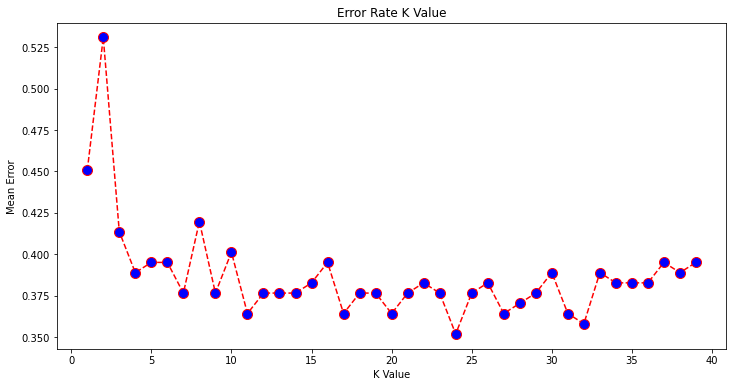

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')